# LOGISTIC REGRESSION

## Credit card defaulter predicition model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [2]:
data = pd.read_excel("Model data.xlsx")


In [4]:
data.head()

,S.No,Duration,Credit History,critical,delay,Bank paid,Purpose of credit,Credit Amount,Amount 4679,Less than 1000,...,Phone,Foreign,HKCAL200*Credit Amount,FOR*CREDIT Amount,CREDITA*DEPEND,Credit classification,Credit Rating,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,1.0,6.0,critical,1.0,0.0,0.0,radio-tv,1169.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,good.,0.0,NaN,NaN,NaN
1,2.0,48.0,all-paid-duly,0.0,0.0,0.0,radio-tv,5951.0,1.0,0.0,...,1.0,1.0,NaN,0.0,0.0,bad.,1.0,NaN,NaN,NaN
2,3.0,12.0,critical,1.0,0.0,0.0,education,2096.0,0.0,0.0,...,1.0,1.0,NaN,0.0,0.0,good.,0.0,NaN,NaN,NaN
3,4.0,42.0,all-paid-duly,0.0,0.0,0.0,furniture,7882.0,1.0,0.0,...,1.0,1.0,NaN,0.0,0.0,good.,0.0,NaN,NaN,NaN
4,5.0,24.0,delay,0.0,1.0,0.0,new-car,4870.0,1.0,0.0,...,1.0,1.0,NaN,0.0,0.0,bad.,1.0,NaN,NaN,NaN


In [8]:
# Understanding the data types for of each variable.
data.dtypes

S.No                      float64
Duration                  float64
Credit History             object
critical                  float64
delay                     float64
Bank paid                 float64
Purpose of credit          object
Credit Amount             float64
Amount 4679               float64
Less than 1000            float64
B1000-5000                float64
B5000-10000               float64
Balance in Savings A/C     object
less than 100             float64
less 500                  float64
less 1000                 float64
over 1000                 float64
Employment                 object
Unemployed                float64
Seven Years               float64
four years                float64
one year                  float64
Install_rate              float64
Marital status             object
Marital Status -FD        float64
Marital Status -MM        float64
Marital Status -SM        float64
Co-applicant               object
Co-applicant_none         float64
Co-applicant G

In [7]:
# Finding the null values
data.isnull().sum()

S.No                        3
Duration                    3
Credit History              3
critical                    3
delay                       3
Bank paid                   3
Purpose of credit           3
Credit Amount               1
Amount 4679                 3
Less than 1000              3
B1000-5000                  3
B5000-10000                 3
Balance in Savings A/C      3
less than 100               3
less 500                    3
less 1000                   3
over 1000                   3
Employment                  3
Unemployed                  3
Seven Years                 3
four years                  3
one year                    3
Install_rate                3
Marital status              3
Marital Status -FD          3
Marital Status -MM          3
Marital Status -SM          3
Co-applicant                3
Co-applicant_none           3
Co-applicant Gaurantor      3
Present Resident            3
Real Estate                 3
Age                         3
Other inst

In [9]:
data.columns


Index(['S.No', 'Duration', 'Credit History', 'critical', 'delay', 'Bank paid',
       'Purpose of credit', 'Credit Amount', 'Amount 4679', 'Less than 1000',
       'B1000-5000', 'B5000-10000', 'Balance in Savings A/C', 'less than 100',
       'less 500', 'less 1000', 'over 1000', 'Employment', 'Unemployed',
       'Seven Years', 'four years', 'one year', 'Install_rate',
       'Marital status', 'Marital Status -FD', 'Marital Status -MM',
       'Marital Status -SM', 'Co-applicant', 'Co-applicant_none',
       'Co-applicant Gaurantor', 'Present Resident', 'Real Estate', 'Age',
       'Other installment', 'Residence', 'Num_Credits', 'Job', 'Unskilled',
       'Skilled', 'No. dependents', 'Phone', 'Foreign',
       'HKCAL200*Credit Amount', 'FOR*CREDIT Amount', 'CREDITA*DEPEND',
       'Credit classification', 'Credit Rating', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49'],
      dtype='object')

Subsetting columns 

In [11]:
data = data[['S.No', 'Duration', 'Credit History', 'critical', 'delay', 'Bank paid',
       'Purpose of credit', 'Credit Amount', 'Amount 4679', 'Less than 1000',
       'B1000-5000', 'B5000-10000', 'Balance in Savings A/C', 'less than 100',
       'less 500', 'less 1000', 'over 1000', 'Employment', 'Unemployed',
       'Seven Years', 'four years', 'one year', 'Install_rate',
       'Marital status', 'Marital Status -FD', 'Marital Status -MM',
       'Marital Status -SM', 'Co-applicant', 'Co-applicant_none',
       'Co-applicant Gaurantor', 'Present Resident', 'Real Estate', 'Age',
       'Other installment', 'Residence', 'Num_Credits', 'Job', 'Unskilled',
       'Skilled', 'No. dependents', 'Phone', 'Foreign', 'FOR*CREDIT Amount', 'CREDITA*DEPEND',
       'Credit classification', 'Credit Rating']]

In [12]:
data.columns


Index(['S.No', 'Duration', 'Credit History', 'critical', 'delay', 'Bank paid',
       'Purpose of credit', 'Credit Amount', 'Amount 4679', 'Less than 1000',
       'B1000-5000', 'B5000-10000', 'Balance in Savings A/C', 'less than 100',
       'less 500', 'less 1000', 'over 1000', 'Employment', 'Unemployed',
       'Seven Years', 'four years', 'one year', 'Install_rate',
       'Marital status', 'Marital Status -FD', 'Marital Status -MM',
       'Marital Status -SM', 'Co-applicant', 'Co-applicant_none',
       'Co-applicant Gaurantor', 'Present Resident', 'Real Estate', 'Age',
       'Other installment', 'Residence', 'Num_Credits', 'Job', 'Unskilled',
       'Skilled', 'No. dependents', 'Phone', 'Foreign', 'FOR*CREDIT Amount',
       'CREDITA*DEPEND', 'Credit classification', 'Credit Rating'],
      dtype='object')

In [13]:
data.head()


,S.No,Duration,Credit History,critical,delay,Bank paid,Purpose of credit,Credit Amount,Amount 4679,Less than 1000,...,Job,Unskilled,Skilled,No. dependents,Phone,Foreign,FOR*CREDIT Amount,CREDITA*DEPEND,Credit classification,Credit Rating
0,1.0,6.0,critical,1.0,0.0,0.0,radio-tv,1169.0,0.0,0.0,...,skilled,0.0,1.0,1.0,0.0,0.0,0.0,0.0,good.,0.0
1,2.0,48.0,all-paid-duly,0.0,0.0,0.0,radio-tv,5951.0,1.0,0.0,...,skilled,0.0,1.0,1.0,1.0,1.0,0.0,0.0,bad.,1.0
2,3.0,12.0,critical,1.0,0.0,0.0,education,2096.0,0.0,0.0,...,unskilled-resident,1.0,0.0,2.0,1.0,1.0,0.0,0.0,good.,0.0
3,4.0,42.0,all-paid-duly,0.0,0.0,0.0,furniture,7882.0,1.0,0.0,...,skilled,0.0,1.0,2.0,1.0,1.0,0.0,0.0,good.,0.0
4,5.0,24.0,delay,0.0,1.0,0.0,new-car,4870.0,1.0,0.0,...,skilled,0.0,1.0,2.0,1.0,1.0,0.0,0.0,bad.,1.0


In [14]:
# Removing null values
data.dropna(inplace = True) 

C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_3848\3853359387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [15]:
data.isnull().sum()


S.No                      0
Duration                  0
Credit History            0
critical                  0
delay                     0
Bank paid                 0
Purpose of credit         0
Credit Amount             0
Amount 4679               0
Less than 1000            0
B1000-5000                0
B5000-10000               0
Balance in Savings A/C    0
less than 100             0
less 500                  0
less 1000                 0
over 1000                 0
Employment                0
Unemployed                0
Seven Years               0
four years                0
one year                  0
Install_rate              0
Marital status            0
Marital Status -FD        0
Marital Status -MM        0
Marital Status -SM        0
Co-applicant              0
Co-applicant_none         0
Co-applicant Gaurantor    0
Present Resident          0
Real Estate               0
Age                       0
Other installment         0
Residence                 0
Num_Credits         

EDA

Note - Here "0" in credit rating means the person has "defaulted" and "1" means "not defaulted".

<AxesSubplot:title={'center':'Credit Rating across critical'}, xlabel='Credit Rating,critical', ylabel='Frequency'>

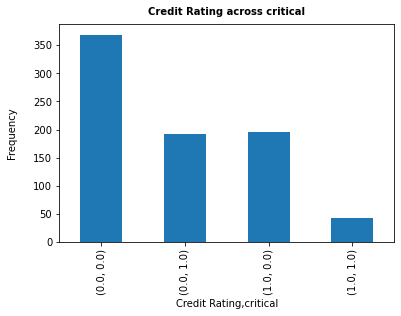

In [16]:
plt.title('Credit Rating across critical', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Frequency', labelpad=16)
data.groupby('Credit Rating')['critical'].value_counts().plot(kind = 'bar')

In [17]:
data.groupby('Credit Rating')['critical'].value_counts()


Credit Rating  critical
0.0            0.0         369
               1.0         192
1.0            0.0         196
               1.0          43
Name: critical, dtype: int64

<AxesSubplot:title={'center':'Credit rating across Duration'}, xlabel='Credit Rating', ylabel='Average Duration'>

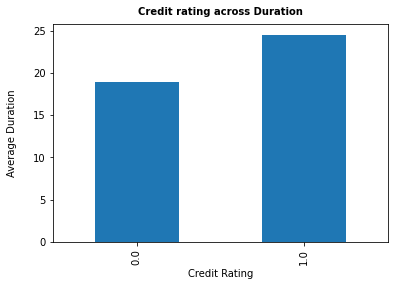

In [18]:
plt.title('Credit rating across Duration', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Average Duration', labelpad=16)
data.groupby('Credit Rating')['Duration'].mean().plot(kind = 'bar')

<AxesSubplot:title={'center':'Credit rating with salary less then 100'}, xlabel='Credit Rating,less than 100', ylabel='Frequncy'>

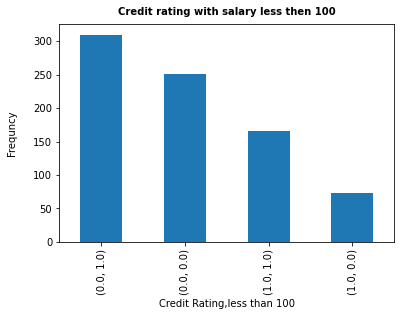

In [19]:
plt.title('Credit rating with salary less then 100', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Frequncy', labelpad=16)
data.groupby('Credit Rating')['less than 100'].value_counts().plot(kind = 'bar')

In [20]:
data['Credit Rating'].value_counts()


0.0    561
1.0    239
Name: Credit Rating, dtype: int64

In [21]:
data.groupby('Credit Rating')['less than 100'].value_counts()


Credit Rating  less than 100
0.0            1.0              310
               0.0              251
1.0            1.0              166
               0.0               73
Name: less than 100, dtype: int64

<AxesSubplot:title={'center':'Credit rating with people havinh 7 years of experience'}, xlabel='Credit Rating,Seven Years', ylabel='Frequency'>

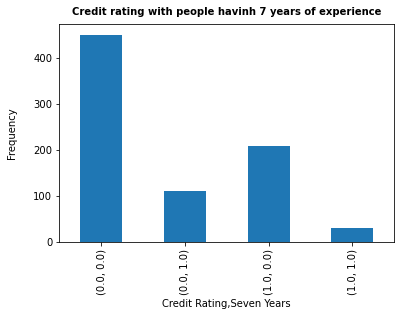

In [22]:
plt.title('Credit rating with people havinh 7 years of experience', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Frequency', labelpad=16)
data.groupby('Credit Rating')['Seven Years'].value_counts().plot(kind = 'bar')

In [23]:
data.groupby('Credit Rating')['Seven Years'].value_counts()


Credit Rating  Seven Years
0.0            0.0            450
               1.0            111
1.0            0.0            209
               1.0             30
Name: Seven Years, dtype: int64

<AxesSubplot:title={'center':'Credit rating with installment rate'}, xlabel='Credit Rating,Install_rate', ylabel='frequency'>

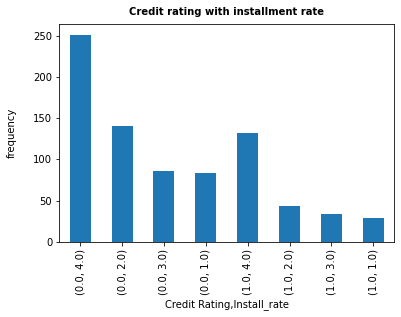

In [24]:
plt.title('Credit rating with installment rate', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('frequency', labelpad=16)
data.groupby('Credit Rating')['Install_rate'].value_counts().plot(kind = 'bar')

In [25]:
data.groupby('Credit Rating')['Install_rate'].value_counts()


Credit Rating  Install_rate
0.0            4.0             251
               2.0             140
               3.0              86
               1.0              84
1.0            4.0             132
               2.0              44
               3.0              34
               1.0              29
Name: Install_rate, dtype: int64

<AxesSubplot:xlabel='Credit Rating,Marital Status -SM'>

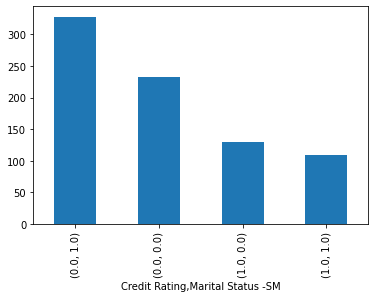

In [26]:
data.groupby('Credit Rating')['Marital Status -SM'].value_counts().plot(kind = 'bar')


In [27]:
data.groupby('Credit Rating')['Marital Status -SM'].value_counts()


Credit Rating  Marital Status -SM
0.0            1.0                   328
               0.0                   233
1.0            0.0                   130
               1.0                   109
Name: Marital Status -SM, dtype: int64

<AxesSubplot:xlabel='Credit Rating,Other installment'>

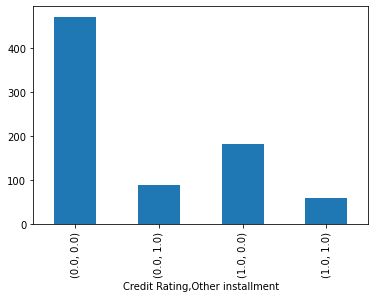

In [28]:
data.groupby('Credit Rating')['Other installment'].value_counts().plot(kind = 'bar')


Based on the above EDA and analysis using the confusion matrix, we have arrived at most suitable variables for making the model in logistic regression. Those independent variables are 'critical','Other installment','Marital Status -SM','Install_rate','Seven Years','less than 100','Duration'

Splitting the data into Dependent and Independent variables


In [29]:
X = data[['critical','Other installment','Marital Status -SM','Install_rate','Seven Years','less than 100','Duration']]


In [30]:
Y = data['Credit Rating']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [66]:
import statsmodels.api as sm

# Adding constant to the training data
X_train_const = sm.add_constant(X_train)

# Initializing and fitting the logistic regression model
lg_reg_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()

# Display the model summary
print(lg_reg_model.summary2())


                Results: Generalized linear model
Model:               GLM               AIC:             724.6292  
Link Function:       Logit             BIC:             -3375.0187
Dependent Variable:  Credit Rating     Log-Likelihood:  -354.31   
Date:                2023-10-03 18:22  LL-Null:         -396.70   
No. Observations:    640               Deviance:        708.63    
Df Model:            7                 Pearson chi2:    637.      
Df Residuals:        632               Scale:           1.0000    
Method:              IRLS                                         
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -2.1964   0.3574 -6.1447 0.0000 -2.8970 -1.4958
critical           -0.8871   0.2220 -3.9958 0.0001 -1.3222 -0.4520
Other installment   0.4344   0.2264  1.9189 0.0550 -0.0093  0.8781
Marital Stat

In [67]:
# Adding constant to the test data
X_test_const = sm.add_constant(X_test)

# Getting the predicted probabilities for the test set
y_pred_prob = lg_reg_model.predict(X_test_const)


### Now we are finding the cutoff score using ROC curve or Youdens Index

In [68]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(y_true, y_pred_prob, threshold):
    y_pred = (y_pred_prob > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

thresholds = [i/100 for i in range(100)]
best_threshold = 0
max_youden = 0

for t in thresholds:
    sens, spec = sensitivity_specificity(y_test, y_pred_prob, t)
    youden_index = sens + spec - 1
    if youden_index > max_youden:
        max_youden = youden_index
        best_threshold = t

print(f"Best Threshold using Youden's Index: {best_threshold}")


Best Threshold using Youden's Index: 0.3


In [69]:
y_pred = (y_pred_prob > best_threshold).astype(int)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 66.88%


In [70]:
from sklearn.metrics import confusion_matrix

# Predicted classes based on the best threshold
y_pred = (y_pred_prob > best_threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[79 41]
 [12 28]]


### Now we have an accuracy of 66% and to reduce the false positive value we can use cost based cutoff method to find the cut off value to get a better cutoff to penalize the false positve and improve the accuracy

---------------------------------------------------------------------------------

In [75]:
def calculate_cost(threshold, y_true, y_pred_prob, c01, c10):
    y_pred = (y_pred_prob > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    p01 = fp / (fp + tn)  # False Positive Rate
    p10 = fn / (fn + tp)  # False Negative Rate
    
    cost = c01 * p01 + c10 * p10
    
    return cost


In [76]:
thresholds = [i/100 for i in range(100)]
c01 = 2
c10 = 1
min_cost = float('inf')
best_cost_threshold = 0

for t in thresholds:
    cost = calculate_cost(t, y_test, y_pred_prob, c01, c10)
    if cost < min_cost:
        min_cost = cost
        best_cost_threshold = t

print(f"Best Threshold using Cost: {best_cost_threshold}")


Best Threshold using Cost: 0.46


In [83]:
# Predicted classes based on the best cost-based threshold
y_pred_cost = (y_pred_prob > best_cost_threshold).astype(int)

# Confusion matrix for cost-based threshold
cm_cost = confusion_matrix(y_test, y_pred_cost)
print("Confusion Matrix for Cost-based Threshold:")
print(cm_cost)

Confusion Matrix for Cost-based Threshold:
[[112   8]
 [ 25  15]]


In [84]:
# Calculating other metrics for the cost-based threshold
tn, fp, fn, tp = cm_cost.ravel()

sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.2f}")

specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.2f}")


Sensitivity (Recall): 0.38
Specificity: 0.93
Precision: 0.65
Accuracy: 0.79


Now the false positive value changed from 41 to 8, which is a very necessary for this particular business and also the acuuracy also increased from 66% to 79%. Thus we created a better model for this business problem to find out the defaulters.

### SUMMARY 


The dataset is based to find the credit card defaulters. After doing proper EDA we were able to find the most suitable variables to construct the model.

We constructed the logistic regression model and found out the threshold value with respect to ROC curve. Here the model was around 66% acuurate having moderate sensitivity and specificity. Now, the model performance can be improved by introducing cost based cutoff. This will penalize the type 1 error and thus we will find out the cutoff value comparitively differnt from the value we got from ROC curve. 

Now after the implementation of cost based cutoff, the accuracy improved to 79 %. Here the threshold value is 0.46, but 0.30 was suggested from ROC curve. Also, we can see huge improvement in specificity and precision of the model.

Overall the model performs much better as the type 1 and type 2 errors also reduced, which is very important for the business.